# UFO Analysis

## Summary

- ### [1. Imports and reading the data](#section1)
- ### [2. Data dictionary](#section2)
- ### [3. Exploring and cleaning the data](#section3)
    - #### [3.1. Transforming columns names](#section3.1)
    - #### [3.2. Checking null values](#section3.2)
    - #### [3.3. Checking and cleaning duplicate data](#section3.3)
    - #### [3.4. Creating a new feature](#section3.4)
- ### [4. Feature understanding](#section4)
    - #### [4.1. Univariated analysis](#section4.1)
    - #### [4.2. Bivariated analysis](#section4.2)
- ### [5. Conclusions](#section5)

<a id='section1'></a> 
# 1.Imports and reading the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno


pd.set_option("display.max_columns", 50)

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")


# setting some Params for the plots
plt.rcParams['axes.titlesize'] = 15   
plt.rcParams['axes.titleweight'] = 'bold'  
plt.rcParams['axes.labelsize'] = 12  
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12  
plt.rcParams['legend.fontsize'] = 12  
plt.rcParams['legend.loc'] = 'upper right'  
plt.rcParams['legend.frameon'] = False  


# Removing spines
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False



In [3]:
#reading the data
df=pd.read_csv(r'UFO_Sightings.csv')#,parse_dates=['Date_time','date_documented'])

<a id='section2'></a> 
# 2. Data dictionary

**Date_time:** Date and time when the UFO was sighted<br>
**date_documented:** Date when the sighting was documented<br>
**Year:** Year when the UFO was sighted<br>
**Month:** Month when the UFO was sighted<br>
**Hour:** Hour when the UFO was sighted<br>
**Season:** Season of the year when the UFO was sighted<br>
**Country_Code:** Country code where the sighting occurred<br>
**Country:** Country where the sighting occurred<br>
**Region:** Region where the sighting occurred<br>
**Locale:** Locale where the sighting occurred<br>
**latitude:** Latitude of the location where the sighting occurred<br>
**longitude:** Longitude of the location where the sighting occurred<br>
**UFO_shape:** Shape of the UFO<br>
**length_of_encounter_seconds:** Duration of the encounter/sighting in seconds<br>
**Encounter_Duration:** Duration of the encounter/sighting<br>
**Description:** Description of the sighting

<a id='section3'></a> 
# 3. Exploring and cleaning the Dataset

In [4]:
df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,2004-04-27,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,2008-01-21,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,2004-01-17,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,2004-01-22,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [5]:
rows,columns=df.shape
print(f'{rows} rows')
print(f'{columns} columns')

80328 rows
16 columns


<a id='section3.1'></a> 
## 3.1. Transforming columns names


In [6]:
#first of all lets turn all of our columns in lower case. We dont have any column name with spaces, but if we did, we could change by underscores
df.columns=df.columns.str.lower()

In [7]:
#checking the data types
df.dtypes

date_time                       object
date_documented                 object
year                             int64
month                            int64
hour                             int64
season                          object
country_code                    object
country                         object
region                          object
locale                          object
latitude                       float64
longitude                      float64
ufo_shape                       object
length_of_encounter_seconds    float64
encounter_duration              object
description                     object
dtype: object

In [8]:
df.columns

Index(['date_time', 'date_documented', 'year', 'month', 'hour', 'season',
       'country_code', 'country', 'region', 'locale', 'latitude', 'longitude',
       'ufo_shape', 'length_of_encounter_seconds', 'encounter_duration',
       'description'],
      dtype='object')

In [9]:
#the columns "Country_Code" and "Country" means the same, as the columns "Length_of_encounter_seconds" and "Encounter_Duration". The columns year, month and hour refers to the date_time column. lets drop "Country", "Encounter_Duration" and 'date_time' columns.
df.drop(columns=['country','encounter_duration','date_time'],inplace=True)

In [10]:
# as we have a date column with dtype=object, lets convert to datetime
df['date_documented']=pd.to_datetime(df['date_documented'])
df.dtypes

date_documented                datetime64[ns]
year                                    int64
month                                   int64
hour                                    int64
season                                 object
country_code                           object
region                                 object
locale                                 object
latitude                              float64
longitude                             float64
ufo_shape                              object
length_of_encounter_seconds           float64
description                            object
dtype: object

<a id='section3.2'></a> 
# 3.2. Checking null values

In [11]:
#checking null values and how much they represents by percentual on each column
df.isnull().sum()/rows*100

date_documented                0.000000
year                           0.000000
month                          0.000000
hour                           0.000000
season                         0.000000
country_code                   0.322428
region                         0.704611
locale                         0.568917
latitude                       0.000000
longitude                      0.000000
ufo_shape                      2.402649
length_of_encounter_seconds    0.000000
description                    0.018673
dtype: float64

The ufo_shape columns has 2.4% of the data as null data. 2.4% does not represets to much data here, so, in this situation, we gonna do nothing.

<a id='section3.3'></a> 
# 3.3. Checking and cleaning duplicate data

In [12]:
#checking duplicated data
df.loc[df.duplicated()]

,date_documented,year,month,hour,season,country_code,region,locale,latitude,longitude,ufo_shape,length_of_encounter_seconds,description
5596,2011-12-12,2011,10,21,Autumn,USA,New York,Suffolk County,40.815278,-73.112778,Light,45.0,10/30/2011 21:00 Ronkonkoma NY bright reddi...
15027,2010-11-21,2010,11,3,Autumn,USA,Kansas,Leavenworth,39.311111,-94.922222,Light,1800.0,Late night UFO excitement in the county
16851,2014-01-24,2014,1,20,Winter,USA,Texas,San Antonio,29.423889,-98.493333,Fireball,120.0,2 fireball like objects over Southern Bexar Co...
21329,2005-01-11,2004,12,9,Winter,USA,Florida,Sebring,27.495278,-81.441111,Circle,30.0,Bright white light appeared in clear blue sky ...
24888,2008-01-21,2008,1,20,Winter,IND,NaN,Chandigarh,30.733315,76.779418,Oval,60.0,Lights blinking or rotating in oval shap in ni...
31166,2006-05-15,2006,3,22,Spring,USA,New Jersey,Brick Township,40.057838,-74.137183,Disk,300.0,It was a orange light that followed my car on ...
37434,2008-06-12,2008,4,22,Spring,USA,Indiana,Noblesville,40.045556,-86.008611,Triangle,180.0,V shaped objects seen in the night sky over ce...
62686,2013-07-05,2013,7,22,Summer,USA,Minnesota,Shakopee,44.798056,-93.526667,Light,300.0,Orange fast orbs.
70776,2013-09-09,2013,8,21,Summer,USA,Virginia,Haymarket,38.811944,-77.636667,Light,30.0,2 bright lights...
71393,2007-08-14,2007,8,20,Summer,USA,Louisiana,Bernard Terrace,30.450556,-91.154444,Fireball,420.0,Flaming Ball over Baton Rouge


"df.duplicated()" ignores the first row and give us all the second and additional rows that area duplicated. So lets work on them.

In [13]:
#lets check one of the duplicated as an example
df.query("year == 2011 & month ==10 & hour == 21 & locale == 'Suffolk County'") 

,date_documented,year,month,hour,season,country_code,region,locale,latitude,longitude,ufo_shape,length_of_encounter_seconds,description
5595,2011-12-12,2011,10,21,Autumn,USA,New York,Suffolk County,40.815278,-73.112778,Light,45.0,10/30/2011 21:00 Ronkonkoma NY bright reddi...
5596,2011-12-12,2011,10,21,Autumn,USA,New York,Suffolk County,40.815278,-73.112778,Light,45.0,10/30/2011 21:00 Ronkonkoma NY bright reddi...


In [14]:
#so we can filter our dataframe without the duplicated data and reset the index
df=df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [15]:
rows,columns=df.shape
print(f'{rows} rows')
print(f'{columns} columns')

80318 rows
13 columns


In [16]:
#lets check if the hour, month and season columns has the correct values.
for column in ['hour','month','season']:
    print(f'{column}:\n')
    print(f'{df[column].unique()}\n')
    print(f'{df[column].nunique()}\n\n')

hour:

[20 21 17 19 23 13 16 22 12  2  0  7  5 18  3 15  4  6 11  9  8 14  1 10]

24


month:

[10  1 11 12  2  3  4  5  6  7  8  9]

12


season:

['Autumn' 'Winter' 'Spring' 'Summer']

4




Everything looks good on he the hour and month columns - 24 hours, 12 months and 4 seasons.

In [17]:
#Lets map the month values to the abreviated name of the months
months_dict = {1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
df['month']=df['month'].map(months_dict)

<a id='section3.4'></a> 
# 3.4. Creating a new feature

In [18]:
#lets create a new feature using the hour columm. We can separate in 4 periods of the day: Dawn, Morning, Afternoon and Evening.
df['period_of_the_day']=np.where(df['hour']<=5,'Dawn',np.where(df['hour']<12,'Morning',np.where(df['hour']<18,'Afternoon','Evening')))

In [19]:
#lets check our dataframe
df.head(7)

,date_documented,year,month,hour,season,country_code,region,locale,latitude,longitude,ufo_shape,length_of_encounter_seconds,description,period_of_the_day
0,2004-04-27,1949,Oct,20,Autumn,USA,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,This event took place in early fall around 194...,Evening
1,2005-12-16,1949,Oct,21,Autumn,USA,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,Evening
2,2008-01-21,1955,Oct,17,Autumn,GBR,England,Chester,53.200000,-2.916667,Circle,20.0,Green/Orange circular disc over Chester&#44 En...,Afternoon
3,2004-01-17,1956,Oct,21,Autumn,USA,Texas,Edna,28.978333,-96.645833,Circle,20.0,My older brother and twin sister were leaving ...,Evening
4,2004-01-22,1960,Oct,20,Autumn,USA,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,Evening
5,2007-04-27,1961,Oct,19,Autumn,USA,Tennessee,Bristol,36.595000,-82.188889,Sphere,300.0,My father is now 89 my brother 52 the girl wit...,Evening
6,2006-02-14,1965,Oct,21,Autumn,GBR,Wales,Penarth,51.434722,-3.180000,Circle,180.0,penarth uk circle 3mins stayed 30ft above m...,Evening


In [20]:
#checking the unique values by each str column
for column in df.select_dtypes('object').columns:
    print(f'Column {column}')
    print(f'{column} unique values: {df[column].nunique()}\n')

Column month
month unique values: 12

Column season
season unique values: 4

Column country_code
country_code unique values: 135

Column region
region unique values: 743

Column locale
locale unique values: 13245

Column ufo_shape
ufo_shape unique values: 29

Column description
description unique values: 79993

Column period_of_the_day
period_of_the_day unique values: 4



Now that we have a cleanse dataframe, lets start our feature understanding.

<a id='section4'></a> 
# 4. Feature understanding
<a id='section4.1'></a> 
## 4.1. Univariated analysis

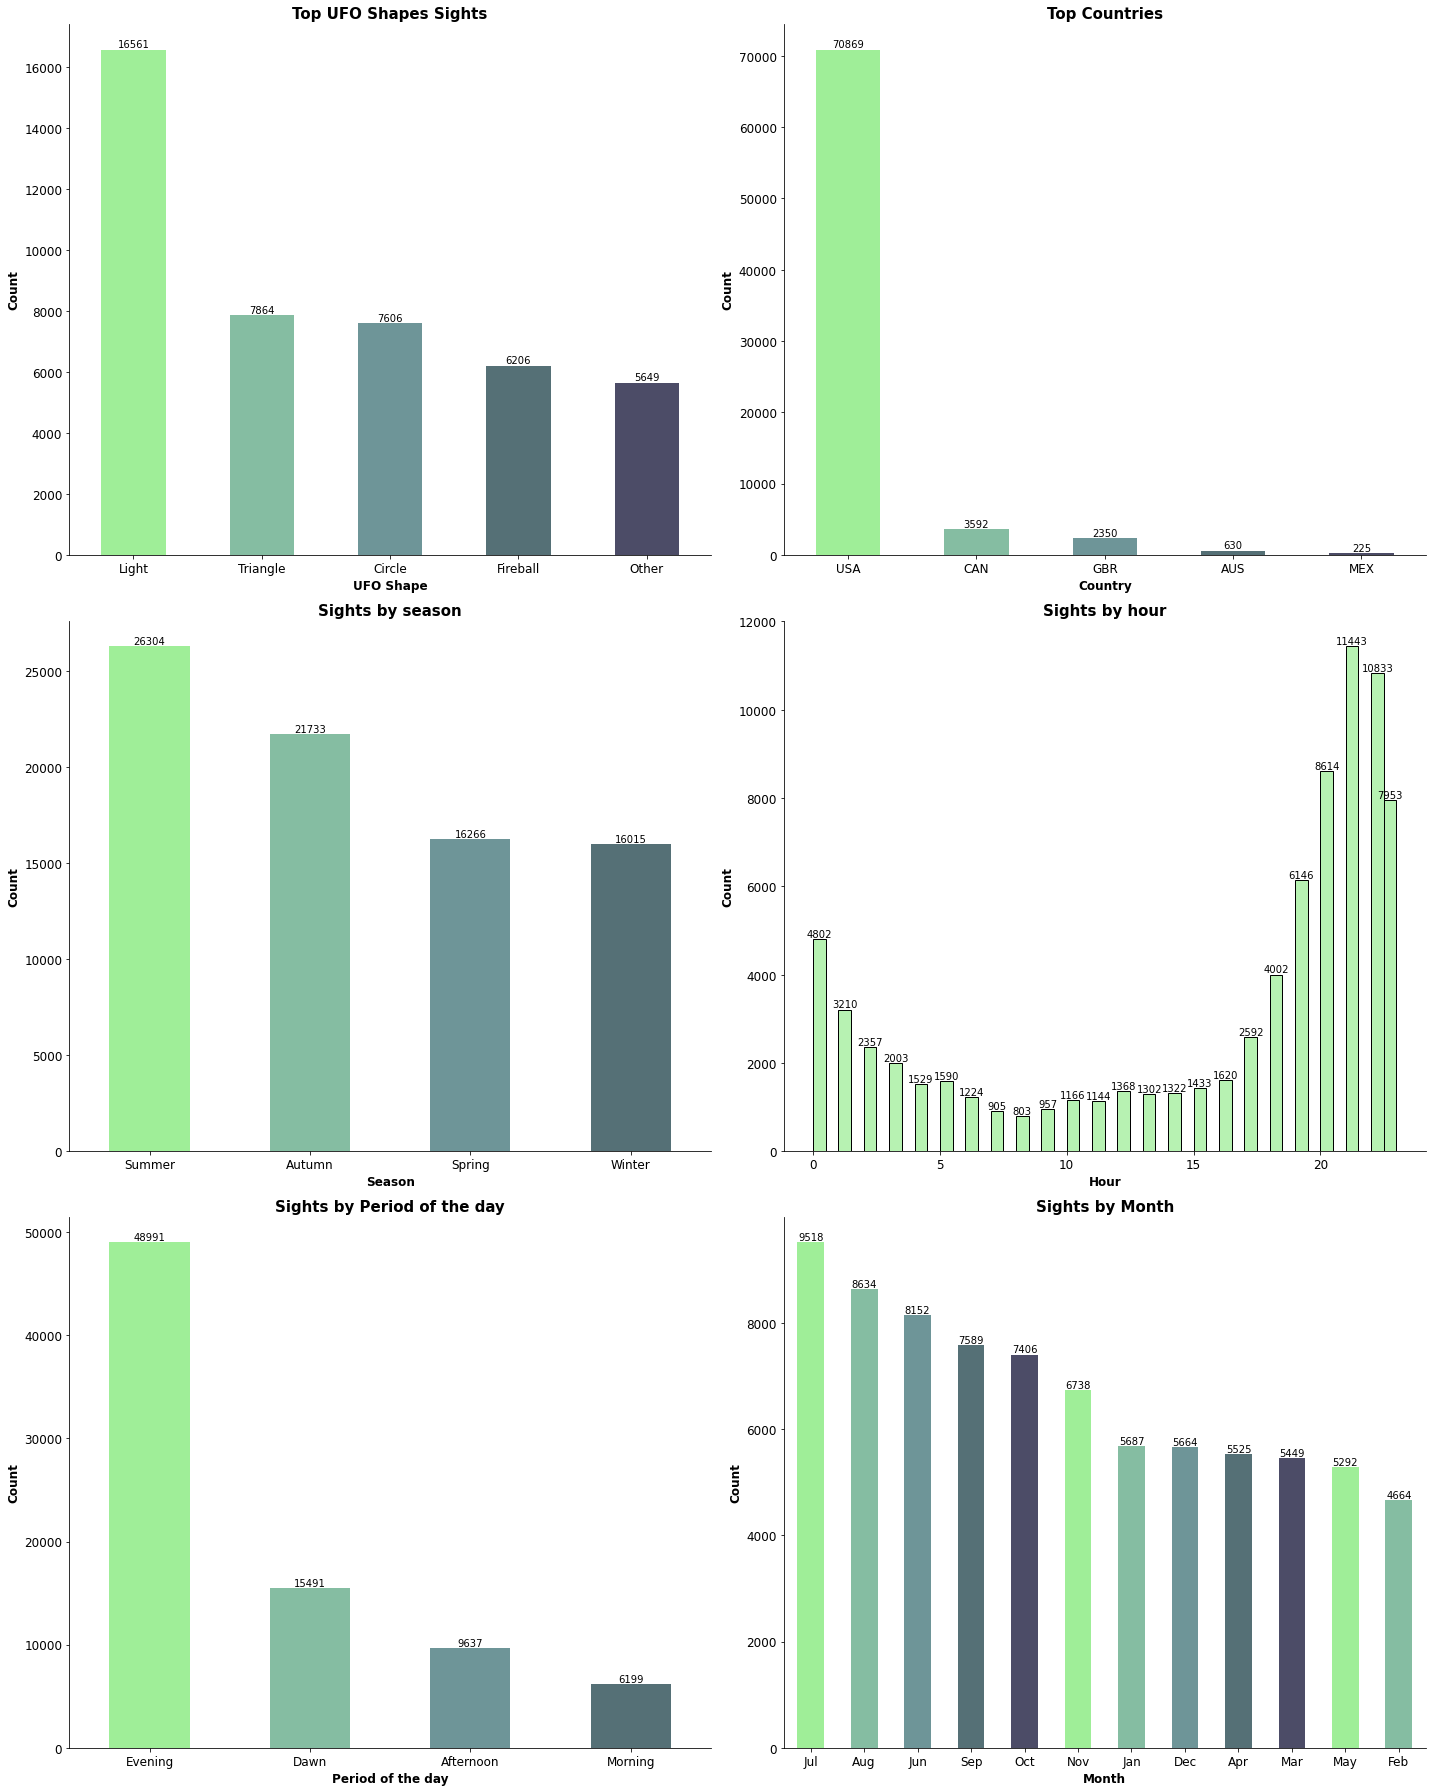

In [21]:
top_5_shapes = df['ufo_shape'].value_counts().head(5)
top_5_countries = df['country_code'].value_counts().head(5)
seasons= df['season'].value_counts()
hour=df['hour'].value_counts()
period_of_the_day=df['period_of_the_day'].value_counts()
month=df['month'].value_counts()


colors=['#9fee98','#85bda2','#6e9598','#557076','#4c4c67']

fig,ax = plt.subplots(3,2,figsize=(20,25))

top_5_shapes.plot(kind='bar',ax=ax[0,0],color=colors)
ax[0,0].set_title('Top UFO Shapes Sights')
ax[0,0].set_xlabel('UFO Shape')
ax[0,0].set_ylabel('Count')
ax[0,0].tick_params(axis='x',rotation=0)
ax[0,0].spines[['top', 'right']].set_visible(False)

top_5_countries.plot(kind='bar',ax=ax[0,1],color=colors)
ax[0,1].set_title('Top Countries')
ax[0,1].set_xlabel('Country')
ax[0,1].set_ylabel('Count')
ax[0,1].tick_params(axis='x',rotation=0)
ax[0,1].spines[['top', 'right']].set_visible(False)

seasons.plot(kind='bar',ax=ax[1,0],color=colors)
ax[1,0].set_title('Sights by season')
ax[1,0].set_xlabel('Season')
ax[1,0].set_ylabel('Count')
ax[1,0].tick_params(axis='x',rotation=0)
ax[1,0].spines[['top', 'right']].set_visible(False)


sns.histplot(df,x='hour',ax=ax[1,1],color=colors[0])
ax[1,1].set_title('Sights by hour')
ax[1,1].set_xlabel('Hour')
ax[1,1].set_ylabel('Count')
ax[1,1].tick_params(axis='x',rotation=0)
ax[1,1].spines[['top', 'right']].set_visible(False)

period_of_the_day.plot(kind='bar',ax=ax[2,0],color=colors)
ax[2,0].set_title('Sights by Period of the day')
ax[2,0].set_xlabel('Period of the day')
ax[2,0].set_ylabel('Count')
ax[2,0].tick_params(axis='x',rotation=0)
ax[2,0].spines[['top', 'right']].set_visible(False)

month.plot(kind='bar',ax=ax[2,1],color=colors)
ax[2,1].set_title('Sights by Month')
ax[2,1].set_xlabel('Month')
ax[2,1].set_ylabel('Count')
ax[2,1].tick_params(axis='x',rotation=0)
ax[2,1].spines[['top', 'right']].set_visible(False)

for i, v in enumerate(top_5_shapes.values):
    ax[0,0].text(i,v,str(v),ha='center',va='bottom')

for i, v in enumerate(top_5_countries.values):
    ax[0,1].text(i,v,str(v),ha='center',va='bottom')

for i, v in enumerate(seasons.values):
    ax[1,0].text(i,v,str(v),ha='center',va='bottom')


for barra in ax[1,1].patches:
    x = barra.get_x() + barra.get_width() / 2
    y = barra.get_height()
    if y!=0:
        ax[1,1].text(x,y,str(y),ha='center',va='bottom')


for i, v in enumerate(period_of_the_day.values):
    ax[2,0].text(i,v,str(v),ha='center',va='bottom')

for i, v in enumerate(month.values):
    ax[2,1].text(i,v,str(v),ha='center',va='bottom')



plt.tight_layout()
plt.show()

Here we have some good information:
- The UFO Shape with most appearences is the light shape;
- The country with most appearences on this data is EUA, with 88% of the sights;
- The Season with most appearences is the summer (maybe aliens likes warmer weather?)
- The period of the day with most appearences is the Evening, most precisely between 9pm and 10pm.
- The month with most appearences is July, followed by August and June.

<a id='section4.2'></a> 
## 4.2. Bivariated analysis

In [22]:
df.dtypes

date_documented                datetime64[ns]
year                                    int64
month                                  object
hour                                    int64
season                                 object
country_code                           object
region                                 object
locale                                 object
latitude                              float64
longitude                             float64
ufo_shape                              object
length_of_encounter_seconds           float64
description                            object
period_of_the_day                      object
dtype: object

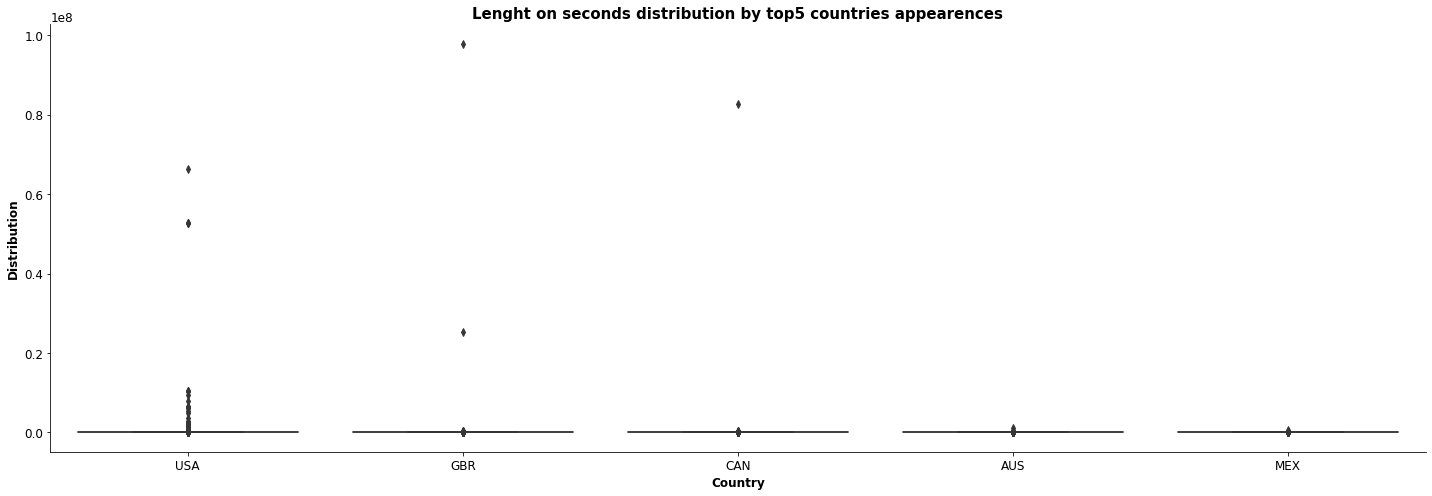

country_code,USA,CAN,GBR,AUS,MEX
length_of_encounter_seconds,6569.28,24316.58,53740.85,3836.67,4551.9


In [23]:
top_5_countries_list=top_5_countries.index.to_list()

fig,ax=plt.subplots(figsize=(20,7))
ax=sns.boxplot(data=df[df['country_code'].isin(top_5_countries_list)], x='country_code',y='length_of_encounter_seconds',palette=colors)
ax.set_title('Lenght on seconds distribution by top5 countries appearences')
ax.set_xlabel('Country')
ax.set_ylabel('Distribution')
ax.tick_params(axis='x', rotation=0)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

display(pd.pivot_table(data=df[df['country_code'].isin(top_5_countries_list)],index='country_code',values='length_of_encounter_seconds',aggfunc='mean').round(2).transpose()[top_5_countries_list])

As we has a lot of outliers, lets drop them out to plot and agg our pivot table by the median

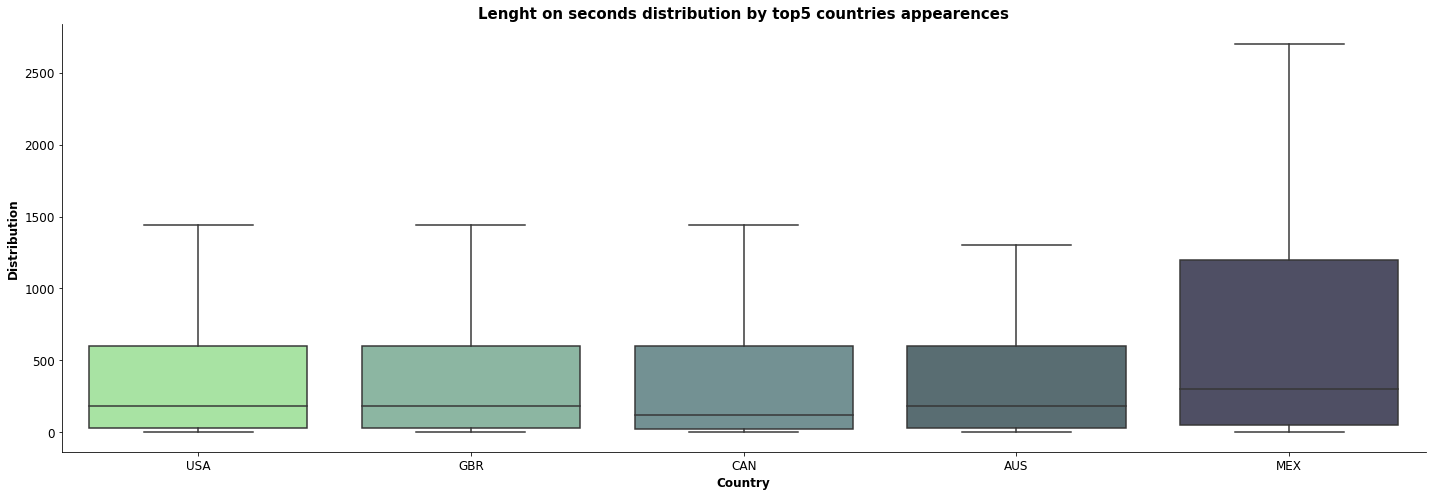

country_code,USA,CAN,GBR,AUS,MEX
length_of_encounter_seconds,180.0,120.0,180.0,180.0,300.0


In [24]:
top_5_countries_list=top_5_countries.index.to_list()

fig,ax=plt.subplots(figsize=(20,7))
ax=sns.boxplot(data=df[df['country_code'].isin(top_5_countries_list)], x='country_code',y='length_of_encounter_seconds',showfliers=False,palette=colors)
ax.set_title('Lenght on seconds distribution by top5 countries appearences')
ax.set_xlabel('Country')
ax.set_ylabel('Distribution')
ax.tick_params(axis='x', rotation=0)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

display(pd.pivot_table(data=df[df['country_code'].isin(top_5_countries_list)],index='country_code',values='length_of_encounter_seconds',aggfunc='median').round(2).transpose()[top_5_countries_list])

Much better this way, and, we can say that Mexico has longer appearences than the other top countries.<br>

Lets do the same with the top shapes, maybe one of them has longer appearences.

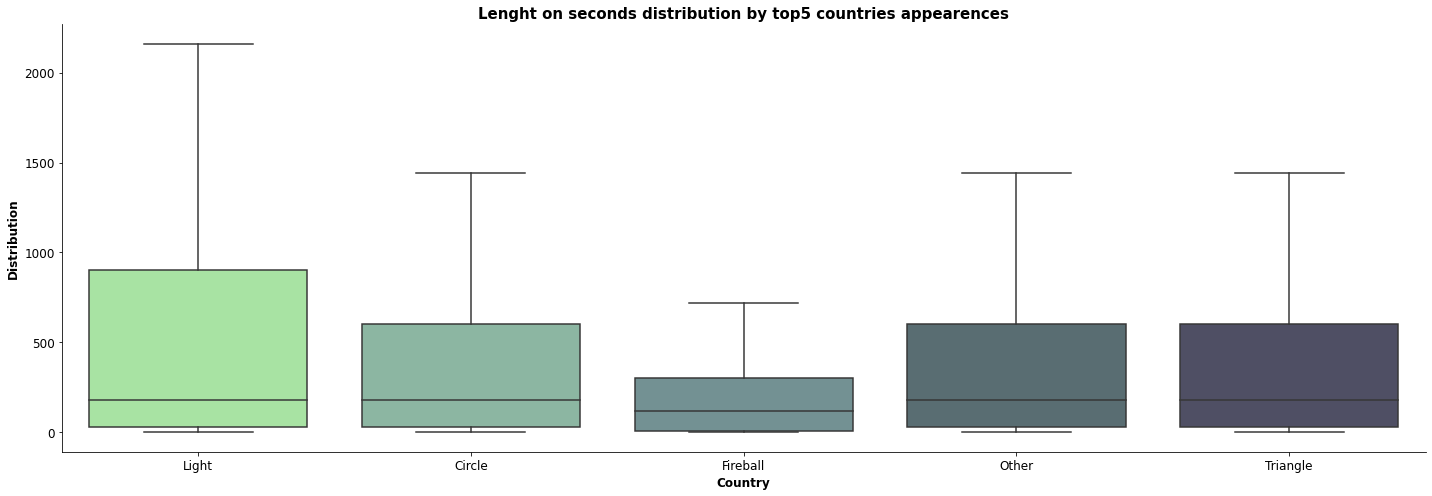

ufo_shape,Light,Triangle,Circle,Fireball,Other
length_of_encounter_seconds,180.0,180.0,180.0,120.0,180.0


In [25]:
top_5_shapes_list=top_5_shapes.index.to_list()

fig,ax=plt.subplots(figsize=(20,7))
ax=sns.boxplot(data=df[df['ufo_shape'].isin(top_5_shapes_list)], x='ufo_shape',y='length_of_encounter_seconds',showfliers=False,palette=colors)
ax.set_title('Lenght on seconds distribution by top5 countries appearences')
ax.set_xlabel('Country')
ax.set_ylabel('Distribution')
ax.tick_params(axis='x', rotation=0)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

display(pd.pivot_table(data=df[df['ufo_shape'].isin(top_5_shapes_list)],index='ufo_shape',values='length_of_encounter_seconds',aggfunc='median').round(2).transpose()[top_5_shapes_list])

None of the top shapes appears much longer than others.

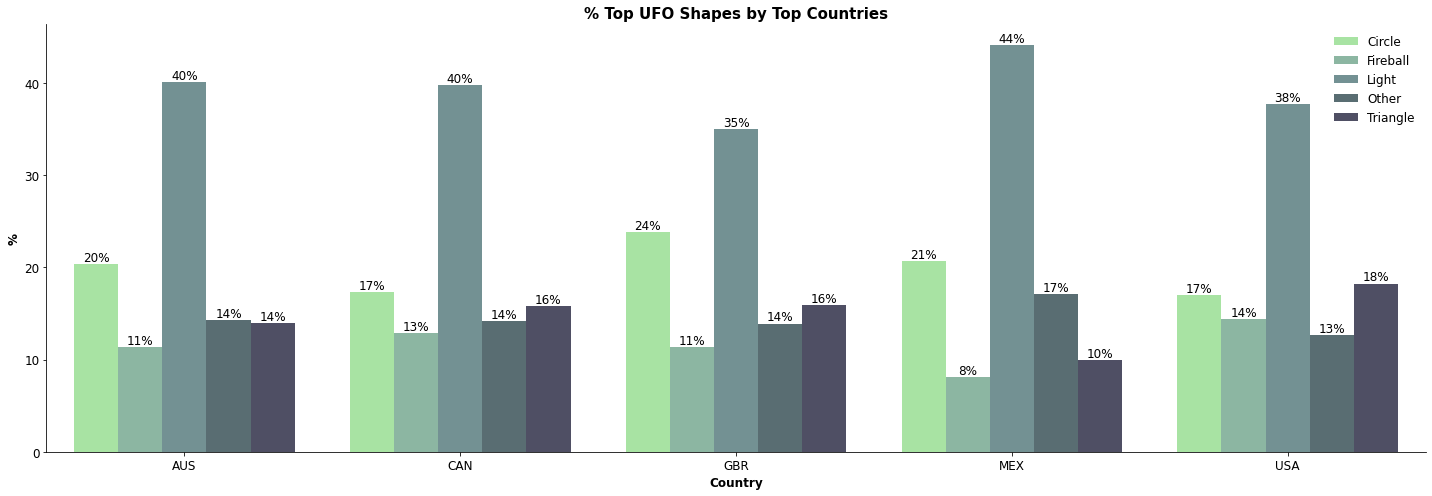

In [26]:
df_shapes_vs_countries=df[df['ufo_shape'].isin(top_5_shapes_list) & (df['country_code'].isin(top_5_countries_list))]

df_shapes_vs_countries=(df_shapes_vs_countries[['ufo_shape','country_code']]
     .groupby(['country_code','ufo_shape'])
         .size().groupby(level=0)
             .apply(lambda x: 100 * x / float(x.sum()))
                 .reset_index().rename(columns={0:'%'}).copy())

fig,ax=plt.subplots(figsize=(20,7))
ax=sns.barplot(data=df_shapes_vs_countries,x='country_code',hue='ufo_shape',y='%',palette=colors)
ax.set_title('% Top UFO Shapes by Top Countries')
ax.set_xlabel('Country')
ax.set_ylabel('%')
ax.tick_params(axis='x', rotation=0)
ax.spines[['top', 'right']].set_visible(False)
ax.legend(frameon=False,loc='upper right')

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y!=0:
        ax.text(x,y,f'{y:.0f}%',ha='center',va='bottom',fontsize=12)

plt.tight_layout()
plt.show()


All of the top countries shows that the light shape is the shape that appears the most. On all the countries,  the second shape with most appears is the circle shape, except on the USA, where the triangle shape is the second shape with most appearences.

<a id='section5'></a> 
# 5. Conclusions

- USA has most UFOs appearences/reports than other countries
- The sights usualy occurs on the evening, precisely between 9pm and 11pm
- Alies likes most the heat weather: theirs appearences occurs most on summer, precisely on July.
- The UFOs shapes looks more like ligths than other shapes
- Mexico, in median, has longer appearences than the other coutries analized
- The second shape with most appears is the circle shape, except on the USA, where the triangle shape is the second shape with most appearences.

##### Recomendation:
- If you are on the USA, on July (summer), between 9pm and 11pm, be careful... Maybe there is an alien behind you :P